In [32]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Результат без введения новых ПВЗ

In [23]:
# Вводные данные
price_fuel = 50  # Цена бензина АИ - 92 в рублях
repair_cost_per_km = 1.3  # Стоимость ремонта за км
repair_cost_per_km_with_vat = repair_cost_per_km * 1.2  # Стоимость ремонта за км с добавлением НДС
monthly_leasing_payment = 65000  # Ежемесячный платеж по лизингу
leasing_month = 36 # Количество месяцев лизинга
driver_salary = 40000  # Зарплата водителя на одну полную ставку
outside_city_points = 2  # Количество новых точек доставки
path_length = 55 # Длина маршрута 

# Расчет затрат на собственный транспорт
fuel_cost_per_day = 12/100 * path_length * price_fuel  # Расходы на топливо в день
repair_cost_per_day = repair_cost_per_km_with_vat * path_length  # Расходы на ремонт в день
leasing_cost_per_day = monthly_leasing_payment / 30  # Расходы на лизинг в день
driver_salary_per_day = 2 * (driver_salary / 30)  # Расходы на зарплату водителей в день
total_cost_own_transport = fuel_cost_per_day + repair_cost_per_day + leasing_cost_per_day + driver_salary_per_day  # Общие затраты на собственный транспорт
print("Затраты на собственный транспорт:", total_cost_own_transport)

# Расчет затрат на наемный транспорт
delivery_cost_per_point = 500
loading_unloading_cost_per_point = 200
delivery_cost_outside_city_per_point = 1000
loading_unloading_cost_outside_city_per_point = 200
total_cost_hired_transport = (delivery_cost_per_point + loading_unloading_cost_per_point) * 5 + (delivery_cost_outside_city_per_point + loading_unloading_cost_outside_city_per_point) * outside_city_points  # Общие затраты на наемный транспорт
print("Затраты на наемный транспорт:", total_cost_hired_transport)

# Сравнение общих затрат
if total_cost_own_transport < total_cost_hired_transport:
    print("Целесообразнее использовать собственный транспорт.")
else:
    print("Целесообразнее использовать наемный транспорт.")

Затраты на собственный транспорт: 5249.133333333333
Затраты на наемный транспорт: 5900
Целесообразнее использовать собственный транспорт.


### От Новосибирска до Искитима 58 км(далее считаем за 50), в связи с расширением внутригордского марштрута до этого города маршрут увеличится примерно на 100 км в связи с этим расчёт будет

In [24]:
# Вводные данные
price_fuel = 50  # Цена бензина АИ - 92 в рублях
repair_cost_per_km = 1.3  # Стоимость ремонта за км
repair_cost_per_km_with_vat = repair_cost_per_km * 1.2  # Стоимость ремонта за км с добавлением НДС
monthly_leasing_payment = 65000  # Ежемесячный платеж по лизингу
driver_salary = 40000  # Зарплата водителя на одну полную ставку
outside_city_points = 2  # Количество новых точек доставки
path_length = 155 # Длина маршрута 

# Расчет затрат на собственный транспорт
fuel_cost_per_day = 12/100 * path_length * price_fuel  # Расходы на топливо в день
repair_cost_per_day = repair_cost_per_km_with_vat * path_length  # Расходы на ремонт в день
leasing_cost_per_day = monthly_leasing_payment / 30  # Расходы на лизинг в день
driver_salary_per_day = 2 * (driver_salary / 30)  # Расходы на зарплату водителей в день
total_cost_own_transport = fuel_cost_per_day + repair_cost_per_day + leasing_cost_per_day + driver_salary_per_day  # Общие затраты на собственный транспорт
print("Затраты на собственный транспорт:", total_cost_own_transport)

# Расчет затрат на наемный транспорт
delivery_cost_per_point = 500
loading_unloading_cost_per_point = 200
delivery_cost_outside_city_per_point = 1000
loading_unloading_cost_outside_city_per_point = 200
total_cost_hired_transport = (delivery_cost_per_point + loading_unloading_cost_per_point) * 5 + (delivery_cost_outside_city_per_point + loading_unloading_cost_outside_city_per_point) * outside_city_points  # Общие затраты на наемный транспорт
print("Затраты на наемный транспорт:", total_cost_hired_transport)

# Сравнение общих затрат
if total_cost_own_transport < total_cost_hired_transport:
    print("Целесообразнее использовать собственный транспорт.")
else:
    print("Целесообразнее использовать наемный транспорт.")

Затраты на собственный транспорт: 6005.133333333333
Затраты на наемный транспорт: 5900
Целесообразнее использовать наемный транспорт.


In [25]:
# Расчет затрат на собственный транспорт без утчёта лизинга
total_cost_own_transport_without_leasing = fuel_cost_per_day + repair_cost_per_day + driver_salary_per_day  # Общие затраты на собственный транспорт
print("Затраты на собственный транспорт:", total_cost_own_transport_without_leasing)

# Расчет затрат на наемный транспорт не изменятся
print("Затраты на наемный транспорт:", total_cost_hired_transport)

# Сравнение общих затрат
if total_cost_own_transport_without_leasing < total_cost_hired_transport:
    print("Целесообразнее использовать собственный транспорт.")
else:
    print("Целесообразнее использовать наемный транспорт.")

Затраты на собственный транспорт: 3838.4666666666662
Затраты на наемный транспорт: 5900
Целесообразнее использовать собственный транспорт.


### Считаем через сколько дней станет выгоднее использовать собственный транспорт

In [28]:
daily_differences_leasing = total_cost_own_transport - total_cost_hired_transport # Каждодневная разница в выгоде
total_differences_leasing = daily_differences_leasing * 30 * leasing_month # Общая разница за время использования лизинга
print("Общая выгода за ремя лизинга:", total_differences_leasing)

Общая выгода за ремя лизинга: 113543.99999999987


In [38]:
own_transport_benefit_without_leasing = total_cost_hired_transport - total_cost_own_transport_without_leasing
result = 30 * leasing_month + (total_differences_leasing / (own_transport_benefit_without_leasing))
rounded_result = math.ceil(result)

print("Количество дней после которого собственный транспорт окупится:", rounded_result)

Количество дней после которого собственный транспорт окупится: 1136


In [79]:
days_in_month = 30
months = 36

# Создаем список значений для каждого дня
values = [daily_differences_leasing] * (days_in_month * months)

# Создаем DataFrame
df = pd.DataFrame({'Month': [month for month in range(1, months + 1) for _ in range(1, days_in_month + 1)],
                   'Day': [day for _ in range(1, months + 1) for day in range(1, days_in_month + 1)],
                   'Daily_Differences_Leasing': values})

# Добавляем столбец с накопительным итогом
df['Cumulative_Total'] = df['Daily_Differences_Leasing'].cumsum()

# Добавляем ещё данные с другим значением Daily_Differences_Leasing
days_in_month = 30
months = 6

# Создаем список значений для каждого дня
new_values = [new_daily_differences_leasing] * (days_in_month * months)

# Создаем DataFrame для новых данных
new_data = pd.DataFrame({'Month': [month for month in range(37, 37 + months) for _ in range(1, days_in_month + 1)],
                         'Day': [day for _ in range(1, months + 1) for day in range(1, days_in_month + 1)],
                         'Daily_Differences_Leasing': new_values})

# Добавляем новые данные к существующему DataFrame
df = pd.concat([df, new_data]).reset_index(drop=True)

# Обновляем столбец с накопительным итогом
df['Cumulative_Total'] = df['Daily_Differences_Leasing'].cumsum()

# Выводим первые несколько строк обновленного DataFrame
print(df)

      Month  Day  Daily_Differences_Leasing  Cumulative_Total
0         1    1                 105.133333        105.133333
1         1    2                 105.133333        210.266667
2         1    3                 105.133333        315.400000
3         1    4                 105.133333        420.533333
4         1    5                 105.133333        525.666667
...     ...  ...                        ...               ...
1255     42   26               -2061.533333    -249285.866667
1256     42   27               -2061.533333    -251347.400000
1257     42   28               -2061.533333    -253408.933333
1258     42   29               -2061.533333    -255470.466667
1259     42   30               -2061.533333    -257532.000000

[1260 rows x 4 columns]


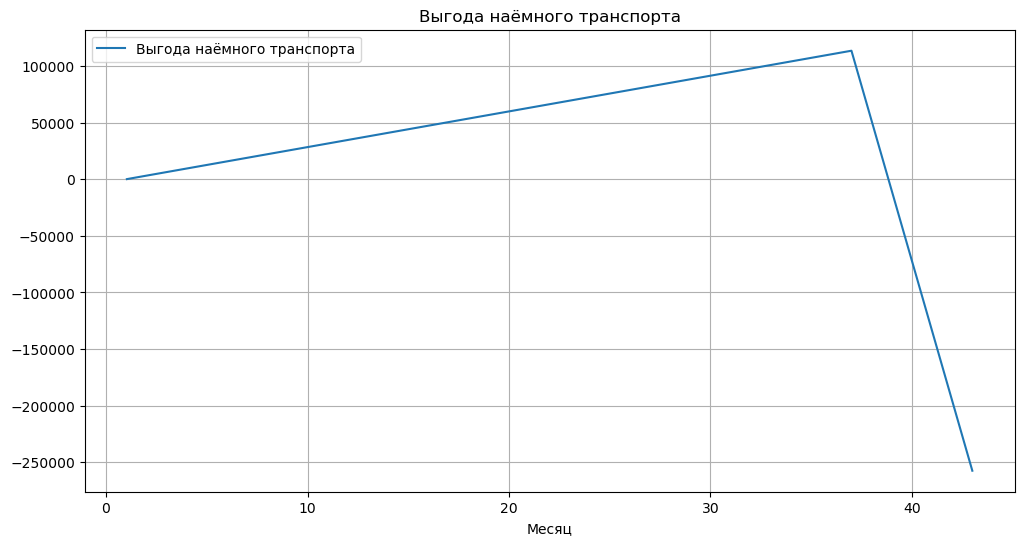

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'] + df['Day']/30, df['Cumulative_Total'], label='Выгода наёмного транспорта')
plt.xlabel('Месяц')
plt.title('Выгода наёмного транспорта')
plt.legend()
plt.grid(True)
plt.show()